                           importance
id.school.origin             0.153848
admission.test               0.153378
PNA                          0.129612
admission.rubric             0.074529
age                          0.053163
region                       0.048175
father.education.complete    0.042880
school.cost                  0.035238
program                      0.032803
mother.education.complete    0.024122
scholarship.perc             0.020129
scholarship.type             0.019367
total.scholarship.loan       0.018154
mother.education.summary     0.017457
foreign                      0.017417
generation                   0.016003
FTE                          0.015152
physical.education           0.015043
father.education.summary     0.014707
max.degree.parents           0.013919
cultural.diffusion           0.013867
gender                       0.013022
student.society              0.012854
school                       0.011942
english.evaluation           0.010339
father.exate

C:\Users\rogel\AppData\Local\Temp\ipykernel_27532\4153906747.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances['importance'], y=feature_importances.index, palette='viridis')


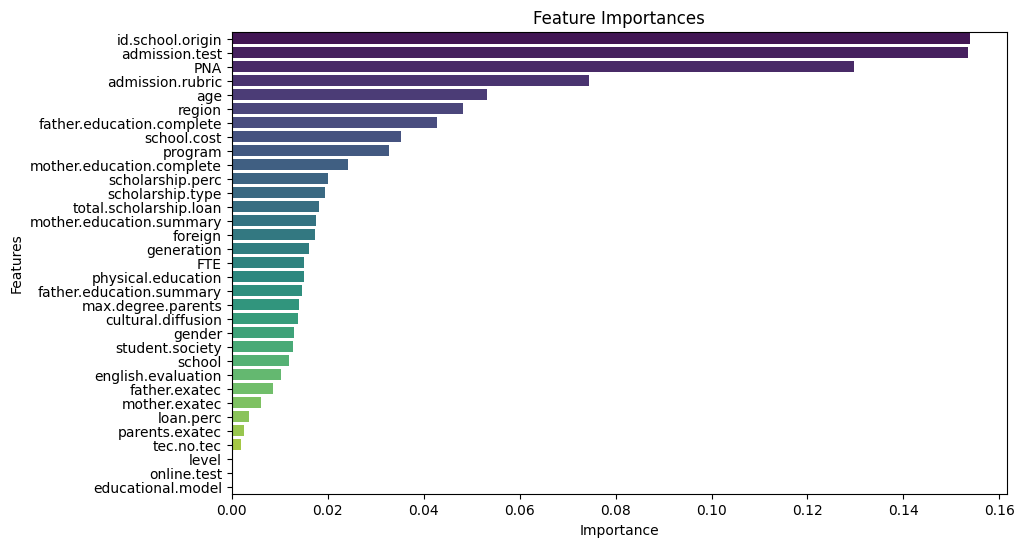

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data_path = './data/label_encoded_scaled_data.csv'  # Replace with the correct path
data = pd.read_csv(data_path)

# Remove unnecessary columns
data = data.drop(['dropout.semester'], axis=1)

# Verify the nature of the target variable
target_column = 'retention'
y = data[target_column]

# If 'retention' is not categorical, convert it
if y.dtype != 'object' and len(y.unique()) > 20:
    y = (y > y.median()).astype(int)  # Convert to binary based on the median

# Use LabelEncoder if 'retention' is categorical
y = LabelEncoder().fit_transform(y)

# Separate the features
X = data.drop(target_column, axis=1)

# Train a Decision Tree to get feature importances
model = DecisionTreeClassifier()
model.fit(X, y)

# Get feature importances
feature_importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

# Select top features (you can choose a threshold or top N features)
threshold = 0.01  # For example, select features with importance > 0.01
important_features = feature_importances[feature_importances['importance'] > threshold].index.tolist()

# Create a new dataset with only the important features
X_important = X[important_features]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_important, y, test_size=0.3, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model with the selected features
model = DecisionTreeClassifier()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances['importance'], y=feature_importances.index, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()
